全局变量

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
WindProducePrice = 0.5 #风电成本 元/kwh
LightProducePrice = 0.4 #光电成本 元/kwh
BuyInPrice = 1 #主电网购入成本 元/kwh
batteryCapacity = 100 #电池容量 kwh
batteryPower = 50 #电池功率 kw

#数据预处理#

In [2]:
data1 = pd.read_excel('A题附件1：各园区典型日负荷数据.xlsx')
data1

,时间（h）,园区A负荷(kW),园区B负荷(kW),园区C负荷(kW)
0,00:00:00,275,241,302
1,01:00:00,275,253,292
2,02:00:00,277,329,307
3,03:00:00,310,315,293
4,04:00:00,310,290,271
5,05:00:00,293,270,252
6,06:00:00,293,307,283
7,07:00:00,380,354,223
8,08:00:00,375,264,292
9,09:00:00,281,315,283


In [3]:
data2 = pd.read_excel('data2.xlsx')#读入数据，附件2
data2 = data2.iloc[30:,]
data2 = data2.reset_index(drop=True)
data2

,说明：表中数据标幺值以相应的风/光额定装机容量为基准,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00:00:00,0,230.1,0,73.2,73.2,303.3,818,514.7
1,01:00:00,0,382.8,0,108.75,108.75,491.55,820,328.45
2,02:00:00,0,296.8,0,197.95,197.95,494.75,913,418.25
3,03:00:00,0,444.4,0,91.55,91.55,535.95,918,382.05
4,04:00:00,0,502.9,0,235.8,235.8,738.7,871,132.3
5,05:00:00,0,360.9,0,310.75,310.75,671.65,815,143.35
6,06:00:00,0,240.2,0,147.3,147.3,387.5,883,495.5
7,07:00:00,4.35,47.3,6.3,60.7,67,118.65,957,838.35
8,08:00:00,226.95,153.8,196.8,12.5,209.3,590.05,931,340.95
9,09:00:00,451.5,106.8,378.84,151.15,529.99,1088.29,879,-209.29


In [4]:
LightProduceByA = data2['Unnamed: 1'].values.tolist()
WinProduceByB = data2['Unnamed: 2'].values.tolist()
LightProduceByC = data2['Unnamed: 3'].values.tolist()
WinProduceByC = data2['Unnamed: 4'].values.tolist()
LoadA = data1['园区A负荷(kW)'].values.tolist()
LoadB = data1['园区B负荷(kW)'].values.tolist()
LoadC = data1['园区C负荷(kW)'].values.tolist()

#第一问第一小问：

In [5]:
EA_buy = np.maximum((np.array(LoadA) - np.array(LightProduceByA)), 0) #shape(24,)
EA_curt = np.maximum((np.array(LightProduceByA) - np.array(LoadA)), 0)
A_LightProduce = np.array(LightProduceByA)

EB_buy = np.maximum((np.array(LoadB) - WinProduceByB), 0)
EB_curt = np.maximum((np.array(WinProduceByB) - np.array(LoadB)), 0)
B_WindProduce = np.array(WinProduceByB)

EC_buy = np.maximum((np.array(LoadC) - np.array(LightProduceByC) - np.array(WinProduceByC)), 0)
EC_curt = np.maximum((np.array(LightProduceByC) + np.array(WinProduceByC) - np.array(LoadC)), 0)
C_LightProduce = np.array(LightProduceByC)
C_WindProduce = np.array(WinProduceByC)

def Compute_Single_Cost(E_buy, E_curt, LightProduce, LightPrice, WindProduce, WindPrice):
    #array : E_buy, E_curt
    #const : LPro, LPri, WPro, WPri
    return E_buy * BuyInPrice + WindProduce * WindPrice + LightProduce * LightPrice

ACost = Compute_Single_Cost(EA_buy, EA_curt, A_LightProduce, LightProducePrice, 0, WindProducePrice)
BCost = Compute_Single_Cost(EB_buy, EB_curt, 0, A_LightProduce, B_WindProduce, WindProducePrice)
CCost = Compute_Single_Cost(EC_buy, EC_curt, C_LightProduce, LightProducePrice, C_WindProduce, WindProducePrice)

APer = ACost.sum() / np.sum(LoadA)
BPer = BCost.sum() / np.sum(LoadB)
CPer = CCost.sum() / np.sum(LoadC)

APer, BPer, CPer

(0.8182957853436275, 0.7159403372243839, 0.7037136059670783)

In [6]:
TotalData = pd.DataFrame(columns=[
    'A园区购电量',
    'A园区弃电量',
    'A园区负荷',
    'A园区总供电成本',
    'A园区平均供电成本',
    'B园区购电量',
    'B园区弃电量',
    'B园区负荷',
    'B园区总供电成本',
    'B园区平均供电成本',
    'C园区购电量',
    'C园区弃电量',
    'C园区负荷',
    'C园区总供电成本',
    'C园区平均供电成本'
    ])
for i in range(len(EA_buy)):
    new_row = pd.DataFrame({
    'A园区购电量':[EA_buy[i]],
    'A园区弃电量':[EA_curt[i]],
    'A园区负荷':[LoadA[i]],
    'A园区总供电成本':[ACost[i]],
    'A园区平均供电成本':[APer],
    'B园区购电量':[EB_buy[i]],
    'B园区弃电量':[EB_curt[i]],
    'B园区负荷':[LoadB[i]],
    'B园区总供电成本':[BCost[i]],
    'B园区平均供电成本':[BPer],
    'C园区购电量':[EC_buy[i]],
    'C园区弃电量':[EC_curt[i]],
    'C园区负荷':[LoadC[i]],
    'C园区总供电成本':[CCost[i]],
    'C园区平均供电成本':[CPer],
    })
    TotalData = pd.concat([TotalData,new_row], ignore_index=False)
TotalData.to_excel('第一题第一小问数据.xlsx')

In [7]:
Check_row = pd.DataFrame({
'园区购电量':[0],
'园区弃电量':[0],
'园区负荷':[0],
'园区总供电成本':[0],
'园区平均供电成本':[0]
})
Check_row['园区购电量']

0    0
Name: 园区购电量, dtype: int64

#第一问第二小问：

In [12]:
def calculate_costs(Produce,Loads,Price,TypedPrice,NoBattery):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 10 #初始化电池容量
    FirstFlag = True
    iteration = 0
    totalcost = 0
    temptotal = 0
    for PowerProduce,Load in zip(Produce,Loads):#PowerProduce为发电量，Load为负荷量
        Demand = Load-PowerProduce #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                CurrentBatteryAvalibleCapacity = min(batteryPower,CurrentBatteryCapacity-min_battery_Capacity) #当前可用电量
                if(Demand-(CurrentBatteryAvalibleCapacity)*0.95>0):#判断是否需要额外买电
                    #Check_row['园区购电量'] = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)
                    BuyInElcCost = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)/Price
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity-=CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - CurrentBatteryAvalibleCapacity
            else:
                #Check_row['园区购电量'] = Demand
                BuyInElcCost = Demand/Price
                ProduceElcCost = (PowerProduce*TypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity):#判断电池是否可以充电
                CurrentBatteryAvalibleCapacity = min(batteryPower,max_battery_Capacity-CurrentBatteryCapacity) #当前可充电量
                if(abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95>0):#判断是否弃电
                   # Check_row['园区弃电量'] = abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity += CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(CurrentBatteryAvalibleCapacity)*0.95
            else:
                #Check_row['园区弃电量'] = abs(Demand)
                ProduceElcCost = (PowerProduce*TypedPrice)
        totalcost = BuyInElcCost+ProduceElcCost
        #Check_row['园区总供电成本'] = totalcost
        temptotal +=totalcost
        iteration +=1
    #CheckData['园区平均供电成本'] = temptotal/np.sum(np.array(Loads))
    return temptotal

In [9]:
def calculate_costs_for_multy(LightProduce,WindProduce,Loads,Price,LightTypedPrice,WindTypedPrice,NoBattery):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 10 #初始化电池容量
    FirstFlag = True
    iteration = 0
    totalcost = 0
    temptotal = 0
    for LightPowerProduce,WindPowerProduce,Load in zip(LightProduce,WindProduce,Loads):#PowerProduce为发电量，Load为负荷量
        PowerProduce = (LightPowerProduce+WindPowerProduce)
        Demand = Load-(LightPowerProduce+WindPowerProduce) #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                CurrentBatteryAvalibleCapacity = min(batteryPower,CurrentBatteryCapacity-min_battery_Capacity) #当前可用电量
                if(Demand-(CurrentBatteryAvalibleCapacity)*0.95>0):#判断是否需要额外买电
                    #Check_row['园区购电量'] = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)
                    BuyInElcCost = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)/Price
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity-=CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - CurrentBatteryAvalibleCapacity
            else:
                #Check_row['园区购电量'] = Demand
                BuyInElcCost = Demand/Price
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity):#判断电池是否可以充电
                CurrentBatteryAvalibleCapacity = min(batteryPower,max_battery_Capacity-CurrentBatteryCapacity) #当前可充电量
                if(abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95>0):#判断是否弃电
                    #Check_row['园区弃电量'] = abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity += CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(CurrentBatteryAvalibleCapacity)*0.95
            else:
                #Check_row['园区弃电量'] = abs(Demand)
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        totalcost = BuyInElcCost+ProduceElcCost
        #Check_row['园区总供电成本'] = totalcost
        temptotal +=totalcost
         # 记录每次循环的数据
            
    return temptotal

In [23]:
calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,[EA_buy*BuyInPrice,
                                                                    A_LightProduce*LightProducePrice,
                                                                    ACost])[0].to_excel('第一问第二小问园区A.xlsx')
calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,[EA_buy*BuyInPrice,
                                                                    A_LightProduce*LightProducePrice,
                                                                    ACost])[1].to_excel('第一问第二小问园区A_用于对比第一小问.xlsx')
calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice,[EB_buy*BuyInPrice,
                                                                 B_WindProduce*WindProducePrice,
                                                                 BCost])[0].to_excel('第一问第二小问园区B.xlsx')
calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice,[EB_buy*BuyInPrice,
                                                                 B_WindProduce*WindProducePrice,
                                                                 BCost])[1].to_excel('第一问第二小问园区B_用于对比第一小问.xlsx')
calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice,[
    EC_buy*BuyInPrice,
    C_LightProduce*LightProducePrice+C_WindProduce*WindProducePrice,
    CCost])[0].to_excel('第一问第二小问园区C.xlsx')
calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice,[
    EC_buy*BuyInPrice,
    C_LightProduce*LightProducePrice+C_WindProduce*WindProducePrice,
    CCost])[1].to_excel('第一问第二小问园区C_用于对比第一小问.xlsx')

#第一问第三小问

In [36]:
temp = [EB_buy*BuyInPrice,
                                                                 B_WindProduce*WindProducePrice,
                                                                 BCost]

In [ ]:
st_c = 0
end_c = 2000
step_c = 1
st_p = 0
end_p = 1000
step_p = 1
CapacityRange = np.arange(st_c,end_c,step_c)
PowerRange = np.arange(st_p,end_p,step_p)
TotalCost_Q_1_3 = np.zeros((len(PowerRange), len(CapacityRange)))
x=-1
for batteryPower in tqdm(PowerRange,desc="Power"):
    x+=1
    y=-1
    for batteryCapacity in tqdm(CapacityRange,desc="Capacity",leave = False):
        y+=1
        SetBatteryCostPer = (batteryCapacity*1800 + batteryPower*800) / (10*365) #分十年均摊电池费用到每天
        TotalCost_Q_1_3[x,y] = (
                              calculate_costs_for_multy(LightProduceByA+LightProduceByC,
                                                        WinProduceByB+WinProduceByC,
                                                        LoadC+LoadB+LoadA,
                                                        BuyInPrice,
                                                        LightProducePrice,WindProducePrice,temp) + 
                               SetBatteryCostPer)

(2000,) (1000,)


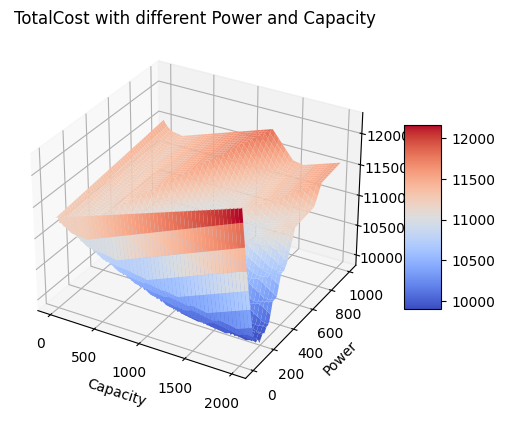

In [42]:
from matplotlib import cm


def Plot_3D(X,xLabel, Y,yLabel, Z,zLabel,title):
    test = pd.DataFrame(X)
    test.to_excel("A+B+C_X.xlsx")
    test = pd.DataFrame(Y)
    test.to_excel("A+B+C_Y.xlsx")
    test = pd.DataFrame(Z)
    test.to_excel("A+B+C_Z.xlsx")
    print(X.shape,Y.shape)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(Z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_zlabel(zLabel)
    ax.set_title(title)
    plt.show()

Plot_3D(CapacityRange, 'Capacity',PowerRange,'Power', TotalCost_Q_1_3, 'TotalCost' , 'TotalCost with different Power and Capacity')
#Plot_3D(PowerRange, 'Power', CapacityRange, 'Capacity',  ACost.sum()+BCost.sum()+CCost.sum()-TotalCost_Q_1_3.T, 'Savings' ,'Difference When battery Added')

In [43]:
MinTotalCost_Q_1_3 = np.min(np.array(TotalCost_Q_1_3))
MinTotalCost_index_Q_1_3 = np.where(np.array(TotalCost_Q_1_3) == MinTotalCost_Q_1_3)
Min_Power_Capacity = list(zip(MinTotalCost_index_Q_1_3[0]+st_p, MinTotalCost_index_Q_1_3[1]+st_c))
np.array(TotalCost_Q_1_3).shape,MinTotalCost_Q_1_3,Min_Power_Capacity


((1000, 2000), 9874.232205479453, [(192, 1991)])

#第二问 第一小题

In [ ]:
TotalLoad = []
ToTalProduce = []
LightProduceByTotal = []
WindProduceByTotal = []
for A,B,C in zip(LoadA,LoadB,LoadC):
    TotalLoad.append(A+B+C)
for A,B,C,D in zip(LightProduceByA,(WinProduceByB),(LightProduceByC),(WinProduceByC)):
    ToTalProduce.append(A+B+C+D)
for A,B in zip(LightProduceByA,LightProduceByC):
    LightProduceByTotal.append(A+B)
for A,B in zip(WinProduceByB,WinProduceByC):
    WindProduceByTotal.append(A+B)

ELeBuyTotal = np.maximum((np.array(TotalLoad) - np.array(ToTalProduce)), 0)
EleCurtTotal = np.maximum((np.array(ToTalProduce) - np.array(TotalLoad)), 0)


def Compute_Single_Cost(E_buy, E_curt, LightProduce, LightPrice, WindProduce, WindPrice):
    #array : E_buy, E_curt
    #const : LPro, LPri, WPro, WPri
    return E_buy * BuyInPrice + WindProduce * WindPrice + LightProduce * LightPrice

TotalCost = Compute_Single_Cost(ELeBuyTotal, EleCurtTotal, np.array(LightProduceByTotal), LightProducePrice, np.array(WindProduceByTotal), WindProducePrice)

TotalPer = TotalCost.sum() / np.sum(TotalLoad)
TotalData = pd.DataFrame(columns=[
    '复合园区购电量',
    '复合园区弃电量',
    '复合园区负荷',
    '复合园区总供电成本',
    '复合园区平均供电成本',
    ])
for i in range(len(EA_buy)):
    new_row = pd.DataFrame({
    '复合园区购电量':[ELeBuyTotal[i]],
    '复合园区弃电量':[EleCurtTotal[i]],
    '复合园区负荷':[TotalLoad[i]],
    '复合园区总供电成本':[TotalCost[i]],
    '复合园区平均供电成本':[TotalPer],
    })
    TotalData = pd.concat([TotalData,new_row], ignore_index=False)
TotalData.to_excel('第二题第一小问数据.xlsx')

#第二问 第二小题

#第三问第一小题

In [48]:
def calculate_costs_for_Q3(params,Produce,Loads,Price,TypedPrice):
    batteryCapacity,batteryPower,WindInc,LightInc = params
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 10 #初始化电池容量
    FirstFlag = True
    iteration = 0
    totalcost = 0
    temptotal = 0
    for PowerProduce,Load in zip(Produce,Loads):#PowerProduce为发电量，Load为负荷量
        PowerProduce+=(WindInc+LightInc)
        Load = Load*1.5
        Demand = Load-PowerProduce #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                CurrentBatteryAvalibleCapacity = min(batteryPower,CurrentBatteryCapacity-min_battery_Capacity) #当前可用电量
                if(Demand-(CurrentBatteryAvalibleCapacity)*0.95>0):#判断是否需要额外买电
                    BuyInElcCost = (Demand-(CurrentBatteryAvalibleCapacity)*0.95)/Price
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity-=CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - CurrentBatteryAvalibleCapacity
            else:
                BuyInElcCost = Demand/Price
                ProduceElcCost = (PowerProduce*TypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity):#判断电池是否可以充电
                CurrentBatteryAvalibleCapacity = min(batteryPower,max_battery_Capacity-CurrentBatteryCapacity) #当前可充电量
                if(abs(Demand)-(CurrentBatteryAvalibleCapacity)/0.95>0):#判断是否弃电
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity += CurrentBatteryAvalibleCapacity
                else:
                    ProduceElcCost = (PowerProduce*TypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(CurrentBatteryAvalibleCapacity)*0.95
            else:
                ProduceElcCost = (PowerProduce*TypedPrice)
        totalcost = BuyInElcCost+ProduceElcCost
        temptotal +=totalcost
        iteration +=1
    return temptotal

In [44]:
batteryCapacity = 0
batteryPower = 0
WindInc = 0
LightInc = 0
params = [batteryCapacity,batteryPower,WindInc,LightInc]
TargetFuntion = calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice,temp)+(3000*LightInc+2500*WindInc+batteryPower*800+batteryCapacity*1800)/(5*365)

SyntaxError: invalid syntax (4122154120.py, line 2)

In [52]:
import numpy as np
from scipy.optimize import minimize

# 定义目标函数
def target_function(params):
    batteryCapacity, batteryPower, WindInc, LightInc = params

    cost = calculate_costs_for_Q3(params,LightProduceByA, LoadA, BuyInPrice, LightProducePrice)
    additional_costs = (3000 * LightInc + 2500 * WindInc + batteryPower * 800 + batteryCapacity * 1800) / (5 * 365)
    
    return cost + additional_costs

# 初始猜测值
initial_guess = [80, 100, 1, 1]

# 使用scipy.optimize.minimize进行优化
result = minimize(target_function, initial_guess, method='BFGS')

# 输出结果
print('优化结果:')
print('电池容量:', result.x[0])
print('电池功率:', result.x[1])
print('风能增长量:', result.x[2])
print('光能增长量:', result.x[3])
print('最小化的目标函数值:', result.fun)


优化结果:
电池容量: 79.48136969066717
电池功率: 89.896124481515
风能增长量: 211.20701793180194
光能增长量: 204.8926469263339
最小化的目标函数值: 6629.573080560373
